In [1]:
import pandas as pd
import numpy as np
# import map_funcs
import sys
import seaborn as sns
import matplotlib.pyplot as plt
#import map_funcs
from IPython.display import Image
import csv
#import xarray as xr


In [2]:
## Load data

data_dir = ('/Users/kathrynmurenbeeld/CODING/FATES/scgsr_traits/')

dat_photo = pd.read_csv(data_dir + 'ID_10SPEC_SCGSR_photo_v04.csv')
dat_dens = pd.read_csv(data_dir + 'ID_10SPEC_SCGSR_dens_v02.csv')
dat_fire = pd.read_csv(data_dir + 'ID_10SPEC_SCGSR_fire.csv')
#dat_hydro = pd.read_csv(data_dir + 'ID_10SPEC_SCGSR_hydro.csv')

baad_dir = '/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/baad_downloads/baad_data/'
baad_df = pd.read_csv(baad_dir + 'baad_data_2.csv').reset_index() 
baad_df = baad_df[['species', 'location', 'h.t', 'd.bh', 'a.lf', 'a.cp', 'm.lf', 'ma.ilf', 'n.lf', 'm.so']].copy()

dat_photo.head(1)

,Common Name,Genus,Species,Latitude,Longitude,Altitude (m),Ecoregion,SLA,SLA units,SLA m2/g,...,Vcmax_units,Plant Organ,Canopy Position,Plant dbh,Plant Age,Plant Age Category,Measurement Methods,Reference,Reference DOI,Simulation Site
0,subalpine fir,Abies,lasiocarpa,NaN,NaN,NaN,ID,232.0,g/m2,0.00431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Remko A. Duursma, John D. Marshall, Jesse B. N...",NaN,NaN


In [3]:
baad_df.head(1)

,species,location,h.t,d.bh,a.lf,a.cp,m.lf,ma.ilf,n.lf,m.so
0,Abies sachalinensis,Japan-Oumu-46,21.96,0.408,NaN,NaN,49.2,NaN,NaN,566.0


#### Separate out the species for the 2 PFTs. PFT1 = pines, PFT2 = Douglas-fir and W. Hemlock

In [4]:
dat_fire['Common Name'].unique()

array(['Lodgepole pine', 'Western white pine', 'Ponderosa pine',
       'Douglas-fir', 'Western larch', 'Grand fir', 'Subalpine fir',
       'Western redcedar', 'Engelmann spruce', 'Western hemlock'],
      dtype=object)

In [5]:
dat_photo.columns = dat_photo.columns.str.replace('lodgepole pine', 'Lodgepole pine')
dat_photo.columns = dat_photo.columns.str.replace('western white pine', 'Western white pine')
dat_photo.columns = dat_photo.columns.str.replace('ponderosa pine', 'Ponderosa pine')

In [6]:
dat_photo_pft1 = dat_photo.loc[(dat_photo['Common Name'] == 'Ponderosa pine') | (dat_photo['Common Name'] == 'Western white Pine') | (dat_photo['Common Name'] == 'Lodgepole pine')].copy()
dat_photo_pft2 = dat_photo.loc[(dat_photo['Common Name'] == 'Douglas-fir') | (dat_photo['Common Name'] == 'Western hemlock')].copy()


In [7]:
dat_photo_pft1['Vcmax'].values

array([   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan, 76.272,
       48.72 , 76.7  , 43.4  , 53.1  , 42.8  , 42.7  ])

In [8]:
dat_dens_pft1 = dat_dens.loc[(dat_dens['Common Name'] == 'Ponderosa Pine') | (dat_dens['Common Name'] == 'Western white Pine') | (dat_dens['Common Name'] == 'Lodgepole pine')].copy()
dat_dens_pft2 = dat_dens.loc[(dat_dens['Common Name'] == 'Douglas-fir') | (dat_dens['Common Name'] == 'Western hemlock')].copy() 



In [9]:
dat_fire_pft1 = dat_fire.loc[(dat_fire['Common Name'] == 'Ponderosa Pine') | (dat_fire['Common Name'] == 'Western white Pine') | (dat_fire['Common Name'] == 'Lodgepole pine')].copy()
dat_fire_pft2 = dat_fire.loc[(dat_fire['Common Name'] == 'Douglas-fir') | (dat_fire['Common Name'] == 'Western hemlock')].copy() 


In [10]:
baad_pft1 = baad_df.loc[(baad_df['species'] == 'Pinus ponderosa') | (baad_df['species'] == 'Pinus monticola') | (baad_df['species'] == 'Pinus contorta')].copy()
baad_pft2 = baad_df.loc[(baad_df['species'] == 'Tsuga heterophylla') | (baad_df['species'] == 'Pseudotsuga menziesii')].copy()


In [11]:
# Convert the BAAD LMA to SLA and combine with the other SLA
baad_sla_pft1 = (1/ (baad_pft1['ma.ilf'].dropna(axis=0).values) /1000)
len(baad_sla_pft1)
sla_pft1 = dat_photo_pft1['SLA m2/g'].dropna(axis=0).values

baad_sla_pft2 = (1/ (baad_pft2['ma.ilf'].dropna(axis=0).values) /1000)
len(baad_sla_pft2)
sla_pft2 = dat_photo_pft2['SLA m2/g'].dropna(axis=0).values
print(len(baad_sla_pft1),len(sla_pft1))
print(len(baad_sla_pft2),len(sla_pft2))

68 53
24 147


In [12]:
sla_pft1 = dat_photo_pft1['SLA m2/g'].dropna(axis=0).values
sla_combine_pft1 = np.hstack((sla_pft1, baad_sla_pft1))
print(len(sla_combine_pft1))

sla_pft2 = dat_photo_pft2['SLA m2/g'].dropna(axis=0).values
sla_combine_pft2 = np.hstack((sla_pft2, baad_sla_pft2))
print(len(sla_combine_pft2))

121
171


In [13]:
dat_photo_pft1['Vcmax'].dropna(axis=0).values

array([76.272, 48.72 , 76.7  , 43.4  , 53.1  , 42.8  , 42.7  ])

Text(0.5, 1.0, 'Bark scalar - PFT2')

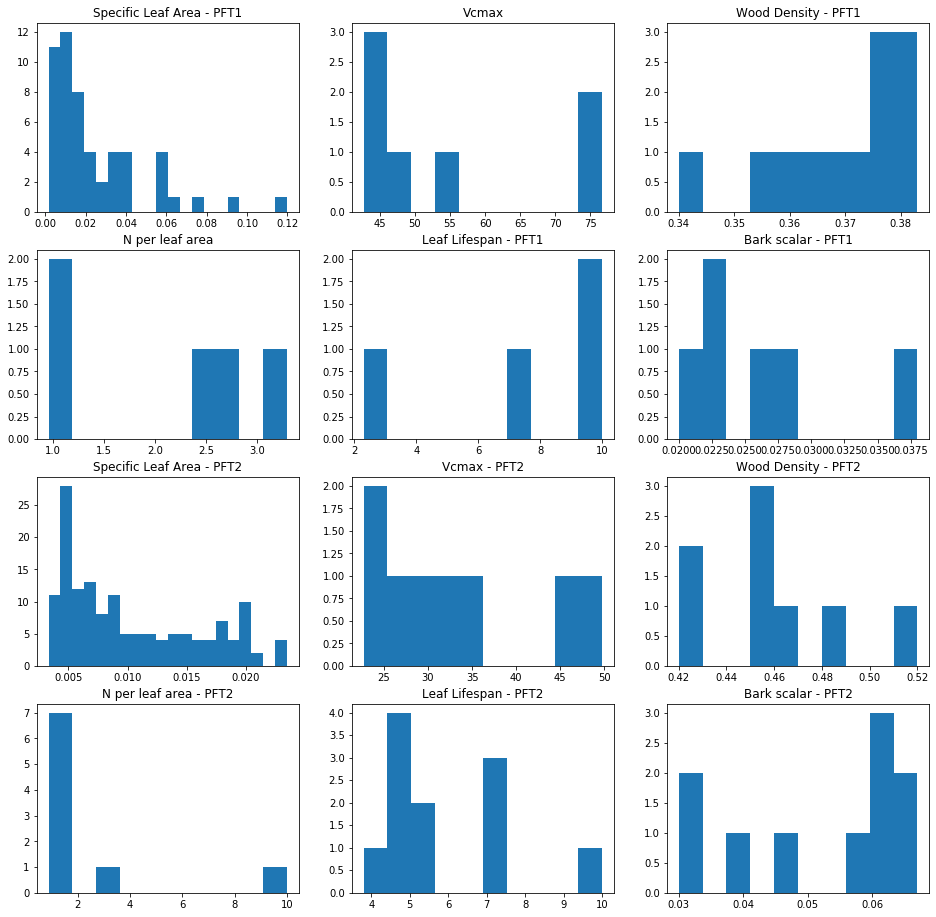

In [14]:
fig, axs = plt.subplots(4, 3, figsize=(16, 16))

axs[0,0].hist(sla_pft1, bins = 20)
axs[0,0].set_title("Specific Leaf Area - PFT1")
axs[0,1].hist(dat_photo_pft1['Vcmax'].dropna(axis=0).values)
axs[0,1].set_title("Vcmax")
axs[0,2].hist(dat_dens_pft1['Wood_density'].dropna(axis=0).values)
axs[0,2].set_title("Wood Density - PFT1")
axs[1,0].hist(dat_photo_pft1['Leaf N'].dropna(axis=0).values)
axs[1,0].set_title("N per leaf area")
axs[1,1].hist(dat_photo_pft1['LEAF_LIFE_YR'].dropna(axis=0).values)
axs[1,1].set_title("Leaf Lifespan - PFT1")
axs[1,2].hist(dat_fire_pft1['bark_scaler'].dropna(axis=0).values)
axs[1,2].set_title("Bark scalar - PFT1")

axs[2,0].hist(sla_pft2, bins = 20)
axs[2,0].set_title("Specific Leaf Area - PFT2")
axs[2,1].hist(dat_photo_pft2['Vcmax'].dropna(axis=0).values)
axs[2,1].set_title("Vcmax - PFT2")
axs[2,2].hist(dat_dens_pft2['Wood_density'].dropna(axis=0).values)
axs[2,2].set_title("Wood Density - PFT2")
axs[3,0].hist(dat_photo_pft2['Leaf N'].dropna(axis=0).values)
axs[3,0].set_title("N per leaf area - PFT2")
axs[3,1].hist(dat_photo_pft2['LEAF_LIFE_YR'].dropna(axis=0).values)
axs[3,1].set_title("Leaf Lifespan - PFT2")
axs[3,2].hist(dat_fire_pft2['bark_scaler'].dropna(axis=0).values)
axs[3,2].set_title("Bark scalar - PFT2")

#fig.suptitle('FIA Height Distribution in SE Idaho')

### Check the data and screen outliers (since data so sparse, outliers can skew the distribution)

In [15]:
# Need to screen SLA and N/area

#sla_mask = sla_combine[sla_combine <= 0.08]

#narea = dat_photo['Leaf N'].dropna(axis=0).values
#narea_mask = narea[ narea <= 4.0]


In [16]:
#sla_mask
#narea_mask

## Bring in the allometry parameters from SCGSR Target Allometry

In [17]:
# Dbh to height O'Brien parameters
d2h_params_pft1 = pd.read_csv('/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/SCGSR_PARAMS/d2h_params_PFT1_20210727.csv')
d2h_params_pft2 = pd.read_csv('/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/SCGSR_PARAMS/d2h_params_PFT2_20210727.csv')
#d2h_params.head(2)

In [18]:
# d2carea parameters

d2ca_params_pft1 = pd.read_csv('/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/SCGSR_PARAMS/d2ca_params_clean_pft1_20210727.csv')
d2ca_params_pft2 = pd.read_csv('/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/SCGSR_PARAMS/d2ca_params_clean_pft2_20210727.csv')

#d2ca_params.head(2)


In [19]:
# d2leaf area parameters

d2la_params_pft1 = pd.read_csv('/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/SCGSR_PARAMS/d2la_params_clean_pft1_20210727.csv')
d2la_params_pft2 = pd.read_csv('/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/SCGSR_PARAMS/d2la_params_clean_pft2_20210727.csv')

#d2la_params.head(2)


In [20]:
# d2blmax parameters

d2blmax_params_pft1 = pd.read_csv('/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/SCGSR_PARAMS/d2blmax_params_clean_pft1_20210727.csv')
d2blmax_params_pft2 = pd.read_csv('/Users/kathrynmurenbeeld/Desktop/Desktop - Kathryn’s MacBook Pro/CLM/FATES/SCGSR_PARAMS/d2blmax_params_clean_pft2_20210727.csv')

#d2blmax_params.head(2)


Text(0.5, 1.0, 'Leaf biomass 2pwr p2 - PFT2')

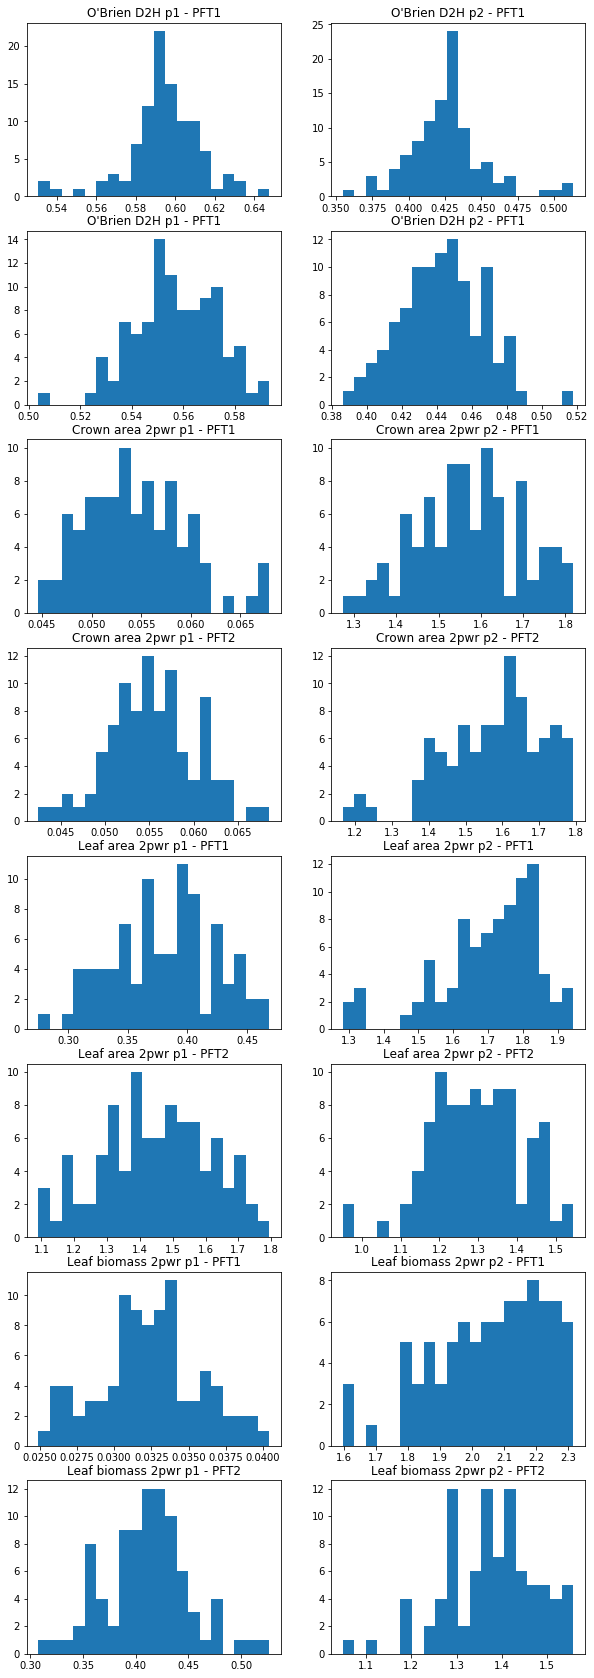

In [21]:
fig, axs = plt.subplots(8, 2, figsize=(10, 30))

axs[0,0].hist(d2h_params_pft1['d2h_p1'].values, bins=20)
axs[0,0].set_title("O'Brien D2H p1 - PFT1")
axs[0,1].hist(d2h_params_pft1['d2h_p2'].values, bins=20)
axs[0,1].set_title("O'Brien D2H p2 - PFT1")

axs[1,0].hist(d2h_params_pft2['d2h_p1'].values, bins=20)
axs[1,0].set_title("O'Brien D2H p1 - PFT1")
axs[1,1].hist(d2h_params_pft2['d2h_p2'].values, bins=20)
axs[1,1].set_title("O'Brien D2H p2 - PFT1")

axs[2,0].hist(d2ca_params_pft1['d2ca_p1'].values, bins=20)
axs[2,0].set_title("Crown area 2pwr p1 - PFT1")
axs[2,1].hist(d2ca_params_pft1['d2ca_p2'].values, bins=20)
axs[2,1].set_title("Crown area 2pwr p2 - PFT1")

axs[3,0].hist(d2ca_params_pft2['d2ca_p1'].values, bins=20)
axs[3,0].set_title("Crown area 2pwr p1 - PFT2")
axs[3,1].hist(d2ca_params_pft2['d2ca_p2'].values, bins=20)
axs[3,1].set_title("Crown area 2pwr p2 - PFT2")

axs[4,0].hist(d2la_params_pft1['d2la_p1'].values, bins=20)
axs[4,0].set_title("Leaf area 2pwr p1 - PFT1")
axs[4,1].hist(d2la_params_pft1['d2la_p2'].values, bins=20)
axs[4,1].set_title("Leaf area 2pwr p2 - PFT1")

axs[5,0].hist(d2la_params_pft2['d2la_p1'].values, bins=20)
axs[5,0].set_title("Leaf area 2pwr p1 - PFT2")
axs[5,1].hist(d2la_params_pft2['d2la_p2'].values, bins=20)
axs[5,1].set_title("Leaf area 2pwr p2 - PFT2")

axs[6,0].hist(d2blmax_params_pft1['d2blmax_p1'].values, bins=20)
axs[6,0].set_title("Leaf biomass 2pwr p1 - PFT1")
axs[6,1].hist(d2blmax_params_pft1['d2blmax_p2'].values, bins=20)
axs[6,1].set_title("Leaf biomass 2pwr p2 - PFT1")

axs[7,0].hist(d2blmax_params_pft2['d2blmax_p1'].values, bins=20)
axs[7,0].set_title("Leaf biomass 2pwr p1 - PFT2")
axs[7,1].hist(d2blmax_params_pft2['d2blmax_p2'].values, bins=20)
axs[7,1].set_title("Leaf biomass 2pwr p2 - PFT2")


In [22]:
## Create a dataframe with selected paramter variables
## Need to mask out certain value thresholds before combining.
## Mask out SLA >0.08, mask out N/area > 4.0. May be more, just keep that in mind, other lose too much data.

column_names = ['Vcmax','wood_density','SLA', 'N/area', 'leaf_long','bark_sc', 'd2h_p1', 'd2h_p2', 'crown_coef',
               'd2bl_p1', 'd2bl_p2']


vcmax_pft1 = pd.Series(dat_photo_pft1['Vcmax'].dropna(axis=0).values)
vcmax_pft2 = pd.Series(dat_photo_pft2['Vcmax'].dropna(axis=0).values)

wood_density_pft1 = pd.Series(dat_dens_pft1['Wood_density'].dropna(axis=0).values)
wood_density_pft2 = pd.Series(dat_dens_pft2['Wood_density'].dropna(axis=0).values)

#sla = pd.Series(dat_photo['SLA m2/g'].dropna(axis=0).values)
#sla = pd.Series(sla_combine)
sla_pft1 = pd.Series(sla_pft1)
sla_pft2 = pd.Series(sla_pft2)

#n_area = pd.Series(dat_photo['Leaf N'].dropna(axis=0).values)
n_area_pft1 = pd.Series(dat_photo_pft1['Leaf N'].dropna(axis=0).values)
n_area_pft2 = pd.Series(dat_photo_pft2['Leaf N'].dropna(axis=0).values)

#n_leaf = pd.Series(baad_nleaf)

leaf_long_pft1 = pd.Series(dat_photo_pft1['LEAF_LIFE_YR'].dropna(axis=0).values)
leaf_long_pft2 = pd.Series(dat_photo_pft2['LEAF_LIFE_YR'].dropna(axis=0).values)

bark_sc_pft1 = pd.Series(dat_fire_pft1['bark_scaler'].dropna(axis=0).values)
bark_sc_pft2 = pd.Series(dat_fire_pft2['bark_scaler'].dropna(axis=0).values)
#p50_node = pd.Series(dat_hydro['p50_node'].dropna(axis=0).values)

#baad_sla = pd.Series(baad_sla)

d2h_p1_pft1 = pd.Series(d2h_params_pft1['d2h_p1'].dropna(axis=0).values)
d2h_p2_pft1 = pd.Series(d2h_params_pft1['d2h_p2'].dropna(axis=0).values)
d2h_p1_pft2 = pd.Series(d2h_params_pft2['d2h_p1'].dropna(axis=0).values)
d2h_p2_pft2 = pd.Series(d2h_params_pft2['d2h_p2'].dropna(axis=0).values)

crown_coef_pft1 = pd.Series(d2la_params_pft1['d2la_p1'].dropna(axis=0).values)
crown_coef_pft2 = pd.Series(d2la_params_pft2['d2la_p1'].dropna(axis=0).values)

#crown_exp_diff = d2ca - d2la

d2bl_p1_pft1 = pd.Series(d2blmax_params_pft1['d2blmax_p1'].dropna(axis=0).values)
d2bl_p2_pft1 = pd.Series(d2blmax_params_pft1['d2blmax_p2'].dropna(axis=0).values)
d2bl_p1_pft2 = pd.Series(d2blmax_params_pft2['d2blmax_p1'].dropna(axis=0).values)
d2bl_p2_pft2 = pd.Series(d2blmax_params_pft2['d2blmax_p2'].dropna(axis=0).values)


df_tmp_pft1 = pd.concat([vcmax_pft1, wood_density_pft1, sla_pft1, n_area_pft1, leaf_long_pft1, 
                         bark_sc_pft1, d2h_p1_pft1, d2h_p2_pft1, crown_coef_pft1, d2bl_p1_pft1, d2bl_p2_pft1], 
                        axis=1)

df_tmp_pft2 = pd.concat([vcmax_pft2, wood_density_pft2, sla_pft2, n_area_pft2, leaf_long_pft2, 
                         bark_sc_pft2, d2h_p1_pft2, d2h_p2_pft2, crown_coef_pft2, d2bl_p1_pft2, d2bl_p2_pft2], 
                        axis=1)
#df_tmp_pft1

vcmax25_indx = 0
wood_density_indx = 1
sla_indx = 2
n_area_indx = 3
lifespan_indx = 4
bark_indx = 5
d2hp1_indx = 6
d2hp2_indx = 7
crown_coef_indx = 8 # crown_to_dbh_coef?
d2blp1_indx = 9 # bleaf_to_dbh_var
d2blp2_indx = 10 # crown_to_dbh_exp


#df = pd.DataFrame({'vcmax': vcmax, 'wood_density': wood_density, 'sla': sla, 'n_area': n_area, 'leaf_long': leaf_long, 'bark_sc': bark_sc, 'p50_node':p50_node}, columns = column_names)
#df = df_tmp.rename(columns={"0" :"Vcmax", "2":"wood_density","3":"SLA","4":"N/area", "5":"leaf_long", "6":"bark_sc", "7":"p50_node"})
df_tmp_pft1.columns = column_names
df_tmp_pft1
df_pft1 = df_tmp_pft1

df_tmp_pft2.columns = column_names
df_tmp_pft2
df_pft2 = df_tmp_pft2

#df_pft1
df_pft2

,Vcmax,wood_density,SLA,N/area,leaf_long,bark_sc,d2h_p1,d2h_p2,crown_coef,d2bl_p1,d2bl_p2
0,49.77,0.454,0.004392,0.890,3.8,0.030,0.569011,0.430206,1.281993,0.410493,1.178946
1,23.15,0.451,0.005900,3.438,4.7,0.067,0.544362,0.466088,1.289546,0.415942,1.280493
2,29.80,0.467,0.009680,1.150,5.0,0.063,0.576454,0.418573,1.571489,0.440080,1.493738
3,34.69,0.480,0.010200,1.090,7.0,0.062,0.576047,0.414865,1.165579,0.360786,1.318213
4,45.22,0.450,0.012230,1.050,7.0,0.056,0.581497,0.414905,1.675719,0.449777,1.546099
...,...,...,...,...,...,...,...,...,...,...,...
142,NaN,NaN,0.020360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,0.021000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,0.019700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,NaN,0.021130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Not sure if these steps are necessary or how df_tm would be different from df above
traits_matrix_pft1 = df_tmp_pft1
traits_matrix_pft1 = np.ma.masked_invalid(traits_matrix_pft1)

traits_matrix_pft2 = df_tmp_pft2
traits_matrix_pft2 = np.ma.masked_invalid(traits_matrix_pft2)

#df_tm_pft1 = pd.DataFrame(traits_matrix_pft1, columns=column_names)

In [24]:
df_pft1.cov()

,Vcmax,wood_density,SLA,N/area,leaf_long,bark_sc,d2h_p1,d2h_p2,crown_coef,d2bl_p1,d2bl_p2
Vcmax,233.480329,0.093468,-1.367808e-02,-7.145110,-22.318733,-0.075286,-0.152920,0.216410,-0.245453,2.570905e-02,-0.664730
wood_density,0.093468,0.000160,5.256727e-05,0.011972,-0.010983,-0.000023,-0.000028,0.000033,0.000066,-8.868945e-06,0.000713
SLA,-0.013678,0.000053,6.009212e-04,0.002233,-0.004061,0.000009,-0.000008,-0.000010,0.000215,-2.492432e-07,0.001090
N/area,-7.145110,0.011972,2.232886e-03,1.050960,-0.521783,0.002631,0.005526,-0.010203,0.014415,-2.030844e-03,0.094632
leaf_long,-22.318733,-0.010983,-4.060881e-03,-0.521783,13.203333,0.001267,0.020103,-0.017620,0.080935,-1.217204e-02,0.408506
bark_sc,-0.075286,-0.000023,9.171461e-06,0.002631,0.001267,0.000043,0.000032,-0.000044,-0.000043,-8.433706e-06,0.000428
d2h_p1,-0.152920,-0.000028,-8.253655e-06,0.005526,0.020103,0.000032,0.000363,-0.000505,0.000075,2.286723e-06,0.000437
d2h_p2,0.216410,0.000033,-1.009973e-05,-0.010203,-0.017620,-0.000044,-0.000505,0.000715,-0.000105,-4.383163e-06,-0.000690
crown_coef,-0.245453,0.000066,2.150127e-04,0.014415,0.080935,-0.000043,0.000075,-0.000105,0.001777,-2.772281e-05,0.000124
d2bl_p1,0.025709,-0.000009,-2.492432e-07,-0.002031,-0.012172,-0.000008,0.000002,-0.000004,-0.000028,1.156191e-05,-0.000006


In [25]:
df_pft2.cov()

,Vcmax,wood_density,SLA,N/area,leaf_long,bark_sc,d2h_p1,d2h_p2,crown_coef,d2bl_p1,d2bl_p2
Vcmax,98.839657,0.075627,0.010449,-3.706851,-4.015286,-0.093864,0.112050,-0.155609,-0.262141,-0.049786,-0.115182
wood_density,0.075627,0.001061,0.000086,-0.001742,-0.006261,-0.000127,0.000332,-0.000544,-0.001882,-0.000322,-0.001166
SLA,0.010449,0.000086,0.000033,-0.003579,0.001402,0.000012,0.000006,-0.000007,0.000065,0.000004,-0.000006
N/area,-3.706851,-0.001742,-0.003579,8.964707,-1.219272,-0.018374,0.015307,-0.024424,0.021952,0.011281,-0.012599
leaf_long,-4.015286,-0.006261,0.001402,-1.219272,2.922681,0.010246,-0.002937,0.002765,0.020109,0.019544,0.123788
bark_sc,-0.093864,-0.000127,0.000012,-0.018374,0.010246,0.000190,-0.000058,0.000098,-0.000010,0.000013,0.000811
d2h_p1,0.112050,0.000332,0.000006,0.015307,-0.002937,-0.000058,0.000262,-0.000375,-0.000017,0.000080,0.000317
d2h_p2,-0.155609,-0.000544,-0.000007,-0.024424,0.002765,0.000098,-0.000375,0.000551,0.000022,-0.000109,-0.000453
crown_coef,-0.262141,-0.001882,0.000065,0.021952,0.020109,-0.000010,-0.000017,0.000022,0.027342,0.000037,0.000157
d2bl_p1,-0.049786,-0.000322,0.000004,0.011281,0.019544,0.000013,0.000080,-0.000109,0.000037,0.001580,0.000249


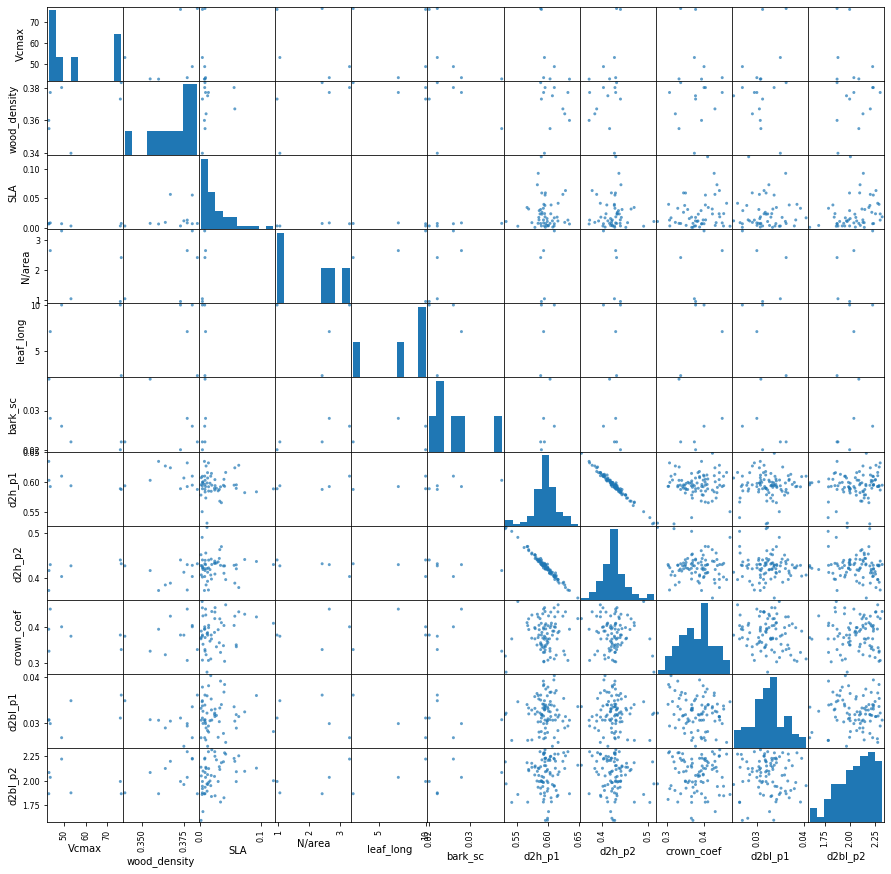

In [26]:
pd.plotting.scatter_matrix(df_pft1, alpha=0.7, figsize=(15,15), diagonal='hist')
plt.show()

In [27]:
df_pft1.describe()

,Vcmax,wood_density,SLA,N/area,leaf_long,bark_sc,d2h_p1,d2h_p2,crown_coef,d2bl_p1,d2bl_p2
count,7.000000,12.000000,53.000000,5.000000,4.000000,6.000000,100.000000,100.000000,88.000000,90.000000,90.000000
mean,54.813143,0.369250,0.024740,2.070200,7.350000,0.026000,0.594812,0.425801,0.380495,0.032366,2.055885
std,15.280063,0.012664,0.024514,1.025163,3.633639,0.006573,0.019059,0.026733,0.042159,0.003400,0.174698
min,42.700000,0.340000,0.001510,0.960000,2.300000,0.020000,0.530703,0.354837,0.275301,0.024931,1.597011
25%,43.100000,0.363000,0.008000,1.050000,5.900000,0.022000,0.587633,0.410887,0.349804,0.030481,1.942547
50%,48.720000,0.374000,0.016237,2.410000,8.550000,0.024000,0.594769,0.426868,0.383565,0.032334,2.091799
75%,64.686000,0.377750,0.033488,2.640000,10.000000,0.027500,0.604583,0.436854,0.407856,0.034155,2.199697
max,76.700000,0.383000,0.119909,3.291000,10.000000,0.038000,0.647554,0.513316,0.468461,0.040403,2.316251


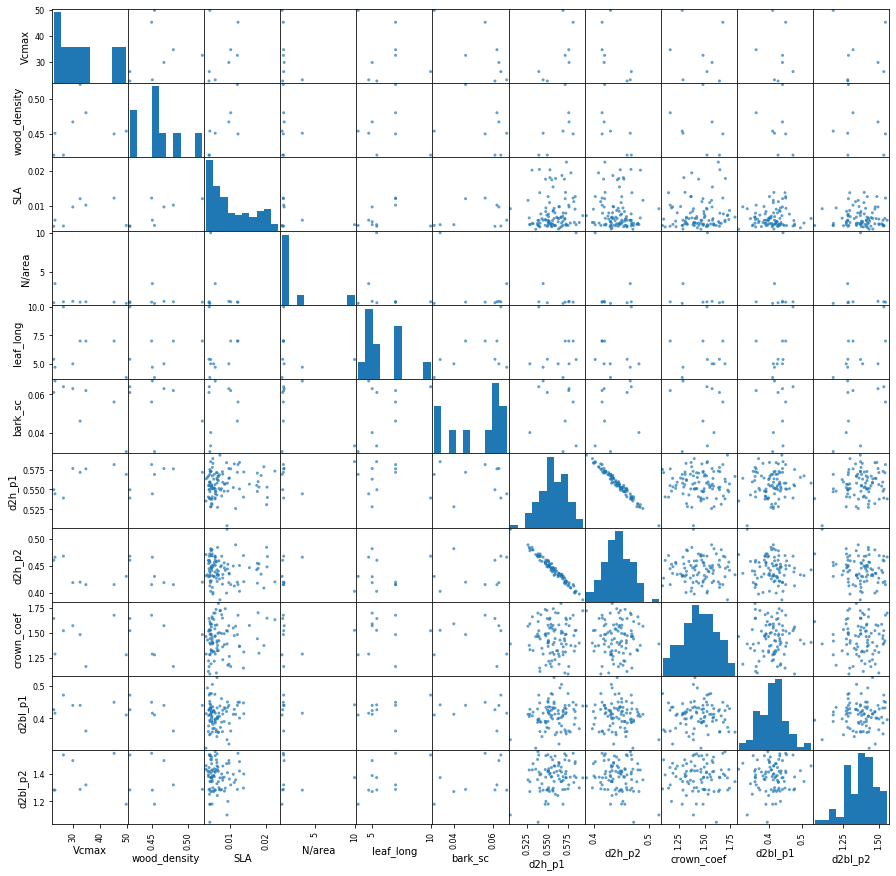

In [28]:
pd.plotting.scatter_matrix(df_pft2, alpha=0.7, figsize=(15,15), diagonal='hist')
plt.show()

In [29]:
df_pft2.describe()

,Vcmax,wood_density,SLA,N/area,leaf_long,bark_sc,d2h_p1,d2h_p2,crown_coef,d2bl_p1,d2bl_p2
count,8.000000,8.00000,147.000000,9.000000,11.000000,10.00000,100.000000,100.000000,95.000000,88.000000,88.000000
mean,33.020000,0.45775,0.010342,2.303111,5.934583,0.05220,0.556861,0.443117,1.448535,0.410292,1.376524
std,9.941814,0.03257,0.005787,2.994112,1.709585,0.01379,0.016200,0.023463,0.165355,0.039750,0.102537
min,22.700000,0.42000,0.003312,0.890000,3.800000,0.03000,0.503871,0.386350,1.090996,0.307704,1.048778
25%,25.512500,0.44250,0.005220,1.050000,5.000000,0.04150,0.547552,0.428733,1.323620,0.387815,1.296415
50%,31.165000,0.45250,0.008442,1.090000,5.380417,0.05850,0.556343,0.444323,1.463148,0.412910,1.380580
75%,37.322500,0.47025,0.014930,1.150000,7.000000,0.06275,0.569011,0.458444,1.572845,0.432479,1.444160
max,49.770000,0.52000,0.023500,10.000000,10.000000,0.06700,0.593415,0.518237,1.793579,0.526464,1.557987


#### Calculate syntehtic traits dataset. Some traits normally distributed and some lognormally distributed

In [30]:
shape_out = [2,100]
n_out = np.zeros(shape_out).size
randomstate = np.random.RandomState(11)


partially_log_traits_matrix_pft1 = traits_matrix_pft1.copy()

# Lognormal distribution for SLA, N area, and leaf long 
columns_log = [2,3,5]
for i in range(len(columns_log)):
    partially_log_traits_matrix_pft1[:,columns_log[i]] = np.ma.log(partially_log_traits_matrix_pft1[:,columns_log[i]])
#partially_log_traits_matrix[:,columns_log[2]] = np.ma.log(partially_log_traits_matrix[:, columns_log[2]])
#partially_log_traits_matrix[:,columns_log[3]] = np.ma.log(partially_log_traits_matrix[:, columns_log[3]])
#partially_log_traits_matrix[:,columns_log[5]] = np.ma.log(partially_log_traits_matrix[:, columns_log[5]])

partially_log_cov_pft1 = np.ma.cov(partially_log_traits_matrix_pft1.transpose())
partially_log_means_pft1 = partially_log_traits_matrix_pft1.mean(axis=0)


In [31]:
#shape_out = [2,100]
shape_out = [1,100]
n_out = np.zeros(shape_out).size
randomstate = np.random.RandomState(11)


partially_log_traits_matrix_pft2 = traits_matrix_pft2.copy()

# Lognormal distribution for SLA, N area, and leaf long 
columns_log = [2,3,5]
for i in range(len(columns_log)):
    partially_log_traits_matrix_pft2[:,columns_log[i]] = np.ma.log(partially_log_traits_matrix_pft2[:,columns_log[i]])
#partially_log_traits_matrix[:,columns_log[2]] = np.ma.log(partially_log_traits_matrix[:, columns_log[2]])
#partially_log_traits_matrix[:,columns_log[3]] = np.ma.log(partially_log_traits_matrix[:, columns_log[3]])
#partially_log_traits_matrix[:,columns_log[5]] = np.ma.log(partially_log_traits_matrix[:, columns_log[5]])

partially_log_cov_pft2 = np.ma.cov(partially_log_traits_matrix_pft2.transpose())
partially_log_means_pft2 = partially_log_traits_matrix_pft2.mean(axis=0)

In [32]:
# Check that the correct columns were log transformed
#partially_log_traits_matrix_pft1[:,2]
#partially_log_traits_matrix_pft2[:,2]

In [33]:
#traits_matrix_pft1[:,2]
#traits_matrix_pft2[:,2]

/Users/kathrynmurenbeeld/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: covariance is not positive-semidefinite.
/Users/kathrynmurenbeeld/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: covariance is not positive-semidefinite.
/Users/kathrynmurenbeeld/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: covariance is not positive-semidefinite.
/Users/kathrynmurenbeeld/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: covariance is not positive-semidefinite.


(10000, 12)
(10000, 12)


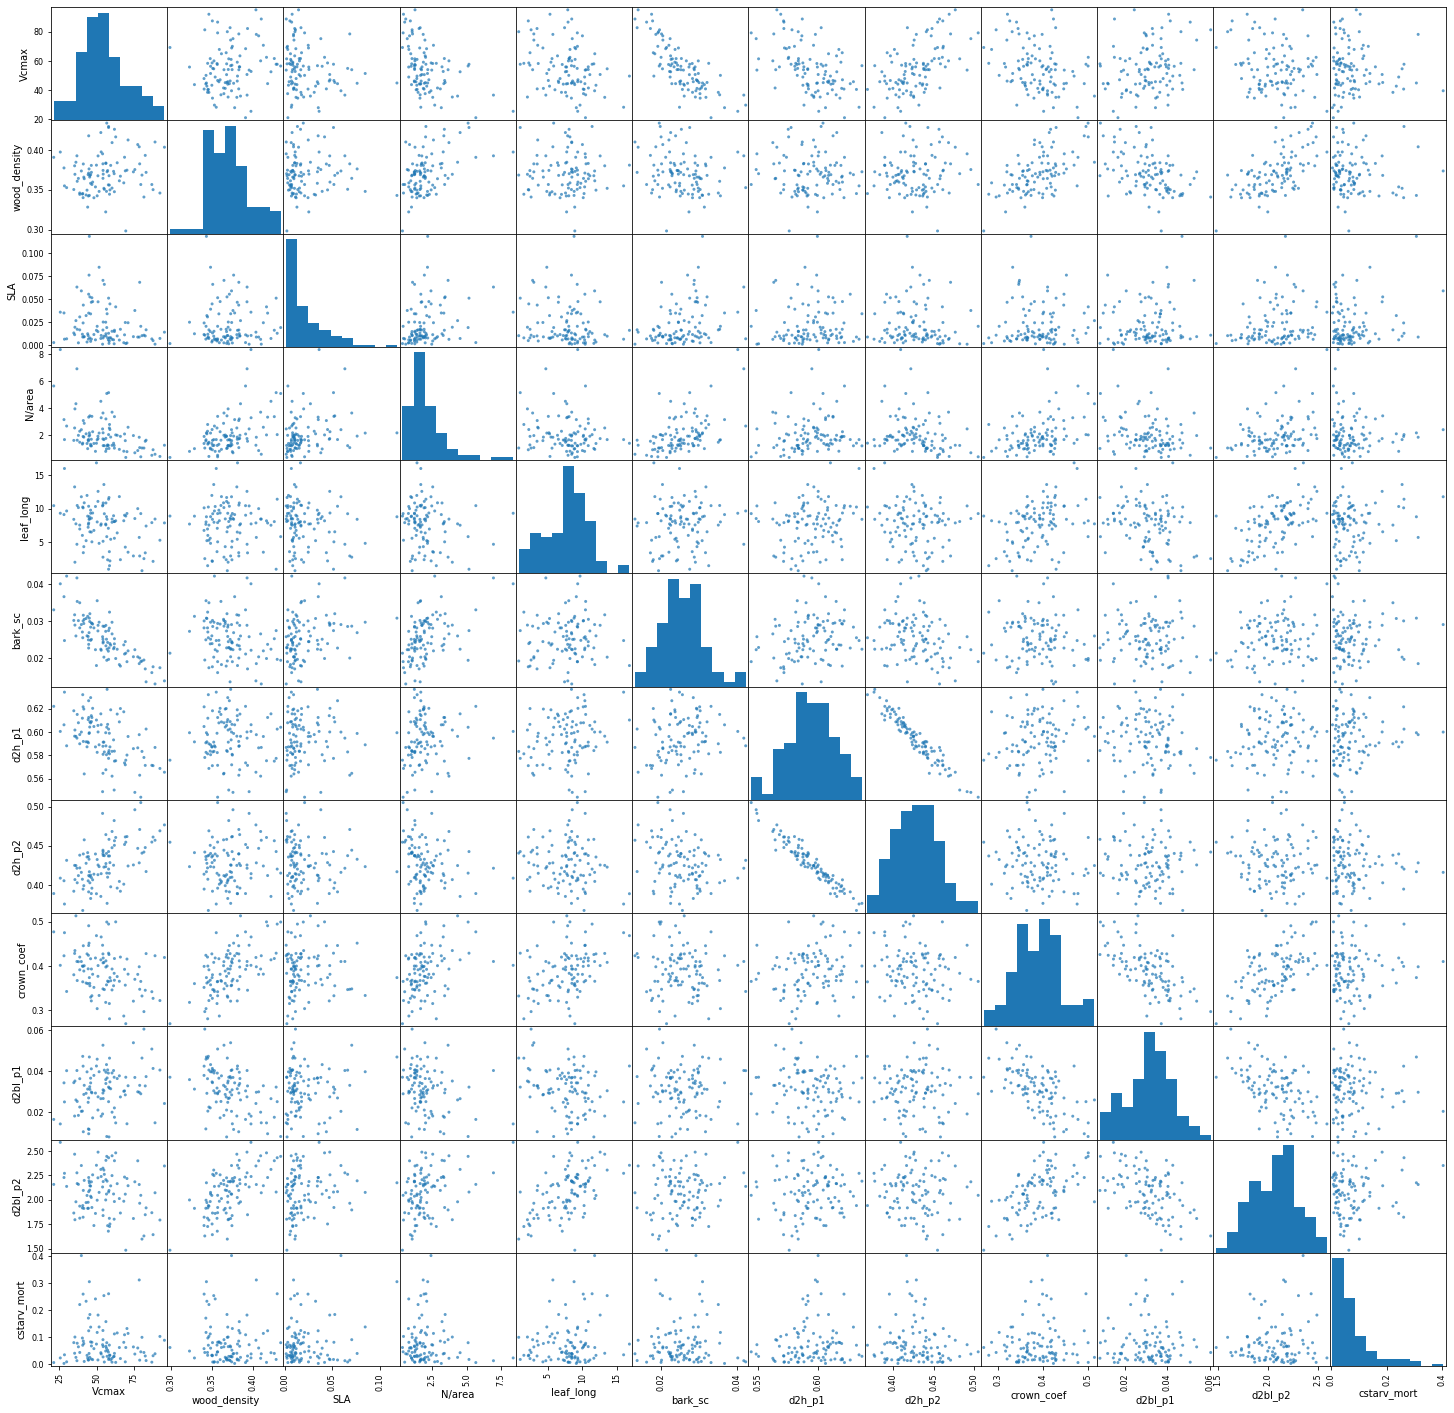

In [34]:
### these next sets of trait distributions are all completely made up.  

max_mort_rate_cstarve_mean = 0.05
max_mort_rate_cstarve_log_variance = (1.)**2
max_mort_rate_cstarve_indx = 11
if not max_mort_rate_cstarve_indx in columns_log:
    columns_log.append(max_mort_rate_cstarve_indx)



ntraits_total = 12
full_trait_cov_matrix_pft1 = np.zeros([ntraits_total,ntraits_total])
full_trait_cov_matrix_pft2 = np.zeros([ntraits_total,ntraits_total])

# we are using the partially log-transformed traits covariance matrix now
#full_trait_cov_matrix[0:3,0:3] = partially_log_cov[:]
full_trait_cov_matrix_pft1[0:11,0:11] = partially_log_cov_pft1[:]
full_trait_cov_matrix_pft2[0:11,0:11] = partially_log_cov_pft2[:]

#full_trait_cov_matrix[mortality_indx,mortality_indx] = mortality_variance
#full_trait_cov_matrix[bleaf_to_dbh_indx,bleaf_to_dbh_indx] = bleaf_to_dbh_variance
#full_trait_cov_matrix[fineroot_to_leaf_indx,fineroot_to_leaf_indx] = fineroot_to_leaf_variance
#full_trait_cov_matrix[npp_repro_indx,npp_repro_indx] = npp_repro_variance
full_trait_cov_matrix_pft1[max_mort_rate_cstarve_indx,max_mort_rate_cstarve_indx] = max_mort_rate_cstarve_log_variance
full_trait_cov_matrix_pft2[max_mort_rate_cstarve_indx,max_mort_rate_cstarve_indx] = max_mort_rate_cstarve_log_variance



means_total_pft1 = np.zeros(ntraits_total)
means_total_pft2 = np.zeros(ntraits_total)
# we are using the partially log-transformed traits covariance matrix now
means_total_pft1[0:11] = partially_log_means_pft1[:]
means_total_pft2[0:11] = partially_log_means_pft2[:]

#means_total[bleaf_to_dbh_indx] = bleaf_to_dbh_mean
#means_total[fineroot_to_leaf_indx] = fineroot_to_leaf_mean
#means_total[npp_repro_indx] = npp_repro_mean
means_total_pft1[max_mort_rate_cstarve_indx] = np.log(max_mort_rate_cstarve_mean)
means_total_pft2[max_mort_rate_cstarve_indx] = np.log(max_mort_rate_cstarve_mean)

backup_factor = 100
X_total_pft1 = randomstate.multivariate_normal(means_total_pft1, np.array(full_trait_cov_matrix_pft1), n_out)
X_total_backup_pft1 = randomstate.multivariate_normal(means_total_pft1, np.array(full_trait_cov_matrix_pft1), n_out*backup_factor)

X_total_pft2 = randomstate.multivariate_normal(means_total_pft2, np.array(full_trait_cov_matrix_pft2), n_out)
X_total_backup_pft2 = randomstate.multivariate_normal(means_total_pft2, np.array(full_trait_cov_matrix_pft2), n_out*backup_factor)


#since we have log-transformed some of the traits data, need to get back to raw values
for i in range(len(columns_log)):
    X_total_pft1[:,columns_log[i]] = np.exp(X_total_pft1[:,columns_log[i]])
    X_total_backup_pft1[:,columns_log[i]] = np.exp(X_total_backup_pft1[:,columns_log[i]])
    X_total_pft2[:,columns_log[i]] = np.exp(X_total_pft2[:,columns_log[i]])
    X_total_backup_pft2[:,columns_log[i]] = np.exp(X_total_backup_pft2[:,columns_log[i]])


### all of these variables are positive definite.  go through them and check each row to make sure that all values
### in the row are positive.  if not, replace the entire row with one from a backup array.

### in addition, we need to ensure that the LAI of a tree with the maximum allowable SLA does not have an LAI 
### that exceeds the array sizes (dinc * nlevleaf) given to it.  pre-calculate the LAI of each ensemble member and 
### exclude trait combination draws that will exceed this value

carbon_fraction_mean = .4482  ## mean of leaf samples in norby dataset
sai_to_lai_ratio = 0.1
slamax_to_slatop = 2.0
max_allowable_lai = 30.  #(assuming a dinc of 1 and a nlevleaf of 30)

print(X_total_backup_pft1.shape)
print(X_total_backup_pft2.shape)

backup_copy = -1
for i in range(n_out):
    if X_total_pft1[i,:].min() <= 0 or ((slamax_to_slatop*(X_total_pft1[i,sla_indx] * carbon_fraction_mean))*(1.+sai_to_lai_ratio)*1e3*X_total_pft1[i,d2blp1_indx]/X_total_pft1[i,crown_coef_indx]) > max_allowable_lai:
        replacement_found = False
        backup_copy = backup_copy + 1
        #print('replacing '+str(i)+', '+str(X_total[i,:].min())+', '+str(((slamax_to_slatop/(X_total[i,lma_indx] * carbon_fraction_mean))*(1.+sai_to_lai_ratio)*1e3*X_total[i,bleaf_to_dbh_indx]/X_total[i,crown_to_dbh_coef_indx])))
        while not replacement_found:
            if X_total_backup_pft1[backup_copy,:].min() > 0 and ((slamax_to_slatop*(X_total_backup_pft1[backup_copy,sla_indx] * carbon_fraction_mean))*(1.+sai_to_lai_ratio)*1e3*X_total_backup_pft1[backup_copy,d2blp1_indx]/X_total_backup_pft1[backup_copy,crown_coef_indx]) <= max_allowable_lai:
                replacement_found = True
            else:
                backup_copy = backup_copy + 1
                if backup_copy >= n_out*backup_factor -1:
                    backup_copy = 0
                    X_total_backup_pft1 = randomstate.multivariate_normal(means_total_pft1, np.array(full_trait_cov_matrix_pft1), n_out*backup_factor)
                    for j in range(len(columns_log)):
                        X_total_backup_pft1[:,columns_log[j]] = np.exp(X_total_backup_pft1[:,columns_log[j]])
        X_total_pft1[i,:] = X_total_backup_pft1[backup_copy,:]
    #print('keeping '+str(i)+', '+str(X_total[i,:].min())+', '+str(((slamax_to_slatop/(X_total[i,lma_indx] * carbon_fraction_mean))*(1.+sai_to_lai_ratio)*1e3*X_total[i,bleaf_to_dbh_indx]/X_total[i,crown_to_dbh_coef_indx])))
column_names_full = ['Vcmax','wood_density','SLA', 'N/area', 'leaf_long','bark_sc', 'd2h_p1', 'd2h_p2', 'crown_coef',
               'd2bl_p1', 'd2bl_p2', 'cstarv_mort']
df4_pft1 = pd.DataFrame(X_total_pft1, columns=column_names_full)
pd.plotting.scatter_matrix(df4_pft1, alpha=0.7, figsize=(25, 25), diagonal='hist')
plt.show()

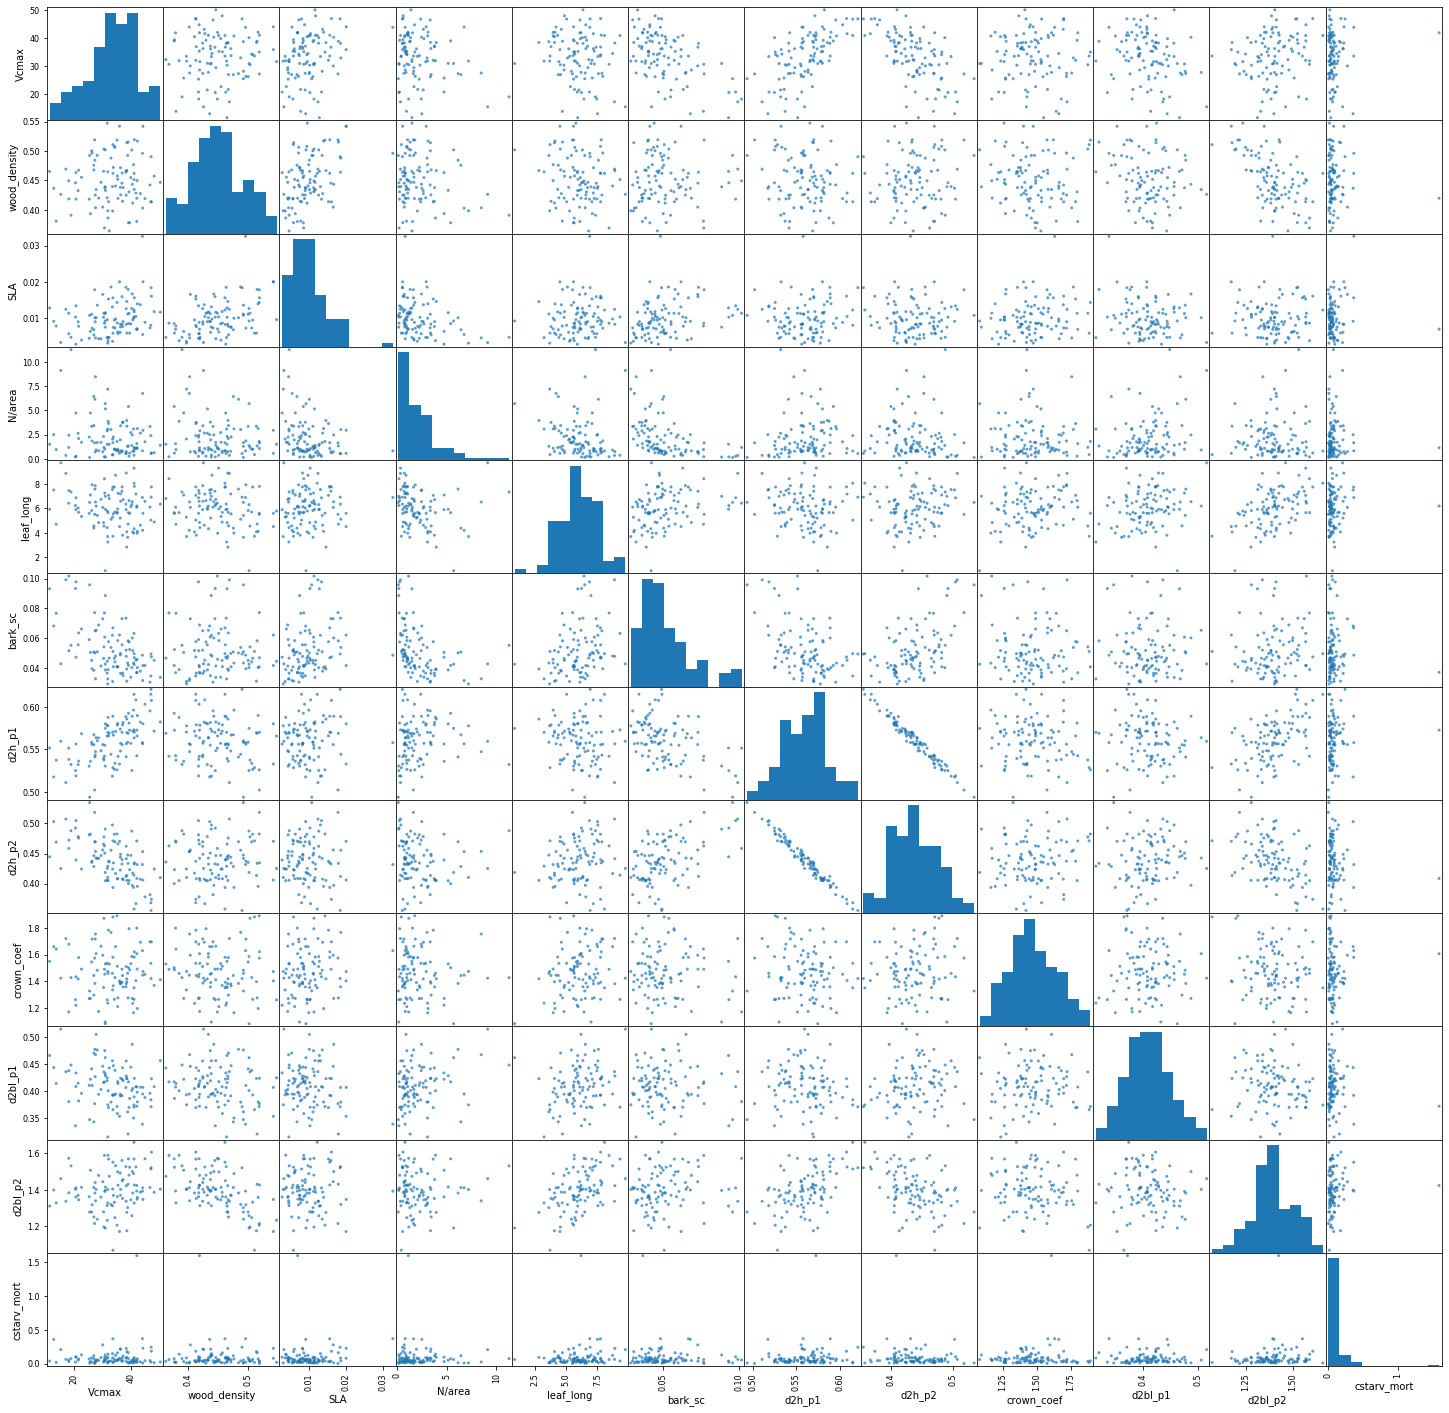

In [35]:
backup_copy = -1
for i in range(n_out):
    if X_total_pft2[i,:].min() <= 0 or ((slamax_to_slatop*(X_total_pft2[i,sla_indx] * carbon_fraction_mean))*(1.+sai_to_lai_ratio)*1e3*X_total_pft2[i,d2blp1_indx]/X_total_pft2[i,crown_coef_indx]) > max_allowable_lai:
        replacement_found = False
        backup_copy = backup_copy + 1
        #print('replacing '+str(i)+', '+str(X_total[i,:].min())+', '+str(((slamax_to_slatop/(X_total[i,lma_indx] * carbon_fraction_mean))*(1.+sai_to_lai_ratio)*1e3*X_total[i,bleaf_to_dbh_indx]/X_total[i,crown_to_dbh_coef_indx])))
        while not replacement_found:
            if X_total_backup_pft2[backup_copy,:].min() > 0 and ((slamax_to_slatop*(X_total_backup_pft2[backup_copy,sla_indx] * carbon_fraction_mean))*(1.+sai_to_lai_ratio)*1e3*X_total_backup_pft2[backup_copy,d2blp1_indx]/X_total_backup_pft2[backup_copy,crown_coef_indx]) <= max_allowable_lai:
                replacement_found = True
            else:
                backup_copy = backup_copy + 1
                if backup_copy >= n_out*backup_factor -1:
                    backup_copy = 0
                    X_total_backup_pft2 = randomstate.multivariate_normal(means_total_pft2, np.array(full_trait_cov_matrix_pft2), n_out*backup_factor)
                    for j in range(len(columns_log)):
                        X_total_backup_pft2[:,columns_log[j]] = np.exp(X_total_backup_pft2[:,columns_log[j]])
        X_total_pft2[i,:] = X_total_backup_pft2[backup_copy,:]
    #print('keeping '+str(i)+', '+str(X_total[i,:].min())+', '+str(((slamax_to_slatop/(X_total[i,lma_indx] * carbon_fraction_mean))*(1.+sai_to_lai_ratio)*1e3*X_total[i,bleaf_to_dbh_indx]/X_total[i,crown_to_dbh_coef_indx])))
column_names_full = ['Vcmax','wood_density','SLA', 'N/area', 'leaf_long','bark_sc', 'd2h_p1', 'd2h_p2', 'crown_coef',
               'd2bl_p1', 'd2bl_p2', 'cstarv_mort']
df4_pft2 = pd.DataFrame(X_total_pft2, columns=column_names_full)
pd.plotting.scatter_matrix(df4_pft2, alpha=0.7, figsize=(25, 25), diagonal='hist')
plt.show()

In [36]:
df4_pft2

,Vcmax,wood_density,SLA,N/area,leaf_long,bark_sc,d2h_p1,d2h_p2,crown_coef,d2bl_p1,d2bl_p2,cstarv_mort
0,42.094456,0.449706,0.007017,1.090357,3.972283,0.045745,0.566004,0.431782,1.491138,0.398181,1.348455,0.032796
1,33.646490,0.461942,0.015591,1.667181,7.735901,0.066850,0.589218,0.393582,1.579603,0.392345,1.549499,0.365620
2,25.389390,0.418178,0.004420,2.240059,5.598982,0.059009,0.530311,0.481156,1.268842,0.410828,1.361890,0.067291
3,35.310394,0.451843,0.006170,0.992318,5.954526,0.058319,0.580628,0.408131,1.208190,0.417645,1.497066,0.057461
4,43.221658,0.427574,0.013680,2.658232,4.623595,0.037811,0.582238,0.407476,1.693327,0.407373,1.386389,0.025183
...,...,...,...,...,...,...,...,...,...,...,...,...
95,21.699086,0.467358,0.007745,2.092218,5.673132,0.063446,0.536267,0.475814,1.577758,0.382112,1.344869,0.067548
96,30.987086,0.439144,0.007498,0.187322,6.987096,0.088577,0.530388,0.490643,1.092261,0.432461,1.395991,0.126500
97,27.001889,0.475761,0.006783,6.428088,4.385734,0.050708,0.567292,0.428535,1.442546,0.343193,1.411518,0.115156
98,35.415208,0.419386,0.005720,0.903779,7.236485,0.040678,0.541869,0.466004,1.274451,0.414322,1.424410,0.055340


#### now we want to write this full set of parameters to a set of fates netcdf parameter files, which we'll use to generate an ensemble of FATES runs.

In [37]:
### 
import netCDF4 as nc4
import sys
import os
import shutil

print(X_total_pft1.shape)
print(X_total_pft2.shape)

def copy_clobber(filename1, filename2):
    try:
        os.remove(filename2)
        print('replacing file: '+filename2)
    except:
        print('file does not yet exist: '+filename2)
    shutil.copyfile(filename1, filename2)

(100, 12)
(100, 12)


In [39]:
filename_template = 'param_file_2PFT_20210621.nc'
filename_output_basename = 'param_file_2PFT_exp2_'

In [40]:
#for i in range(n_out/shape_out[0]):
for i in range(100):
    filename_out = filename_output_basename+str(i+1).zfill(4)+'_c210802.nc'
    copy_clobber(filename_template,filename_out)
    fin = nc4.Dataset(filename_out, 'r+')
    #
    vcmax25var = fin.variables['fates_leaf_vcmax25top']
    #vcmax25var[:] = X_total_pft1[i*shape_out[0],vcmax25_indx].squeeze() # for 1 PFT
    vc = np.array([X_total_pft1[i*shape_out[0],vcmax25_indx],X_total_pft2[i*shape_out[0],vcmax25_indx]])
    vcmax25var[:] = vc.squeeze() # for 2 PFTs
    #vcmax25var[0,1] = X_total_pft2[i*shape_out[0],vcmax25_indx].squeeze() # for 2 PFTs, PFT2
    #vcmax25var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],vcmax25_indx].squeeze()
    #
    wood_density_var = fin.variables['fates_wood_density']
    #wood_density_var[:] = X_total_pft1[i*shape_out[0],wood_density_indx].squeeze()
    wd = np.array([X_total_pft1[i*shape_out[0],wood_density_indx],X_total_pft2[i*shape_out[0],wood_density_indx]])
    wood_density_var[:] = wd.squeeze()
    #wood_density_var[:] = X_total_pft1[i*shape_out[0],wood_density_indx].squeeze() # for 2 PFTs, PFT1
    #wood_density_var[:] = X_total_pft2[i*shape_out[0],wood_density_indx].squeeze() # for 2 PFTs, PFT2
    #wood_density_var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],wood_density_indx].squeeze()
    #
    slatopvar = fin.variables['fates_leaf_slatop']
    #slatopvar[:] = 1./(X_total[i*shape_out[0]:(i+1)*shape_out[0],lma_indx] * carbon_fraction_mean).squeeze()
    slatop = np.array([X_total_pft1[i*shape_out[0],sla_indx] * carbon_fraction_mean, X_total_pft2[i*shape_out[0],sla_indx] * carbon_fraction_mean])
    slatopvar[:] = slatop.squeeze()
    #slatopvar[:] = (X_total_pft1[i*shape_out[0],sla_indx] * carbon_fraction_mean).squeeze()
    #slatopvar[:] = (X_total[i*shape_out[0]:(i+1)*shape_out[0],sla_indx] * carbon_fraction_mean).squeeze()
    #
    ### try making the maximum SLA (i.e. at the base of the canopy) equal to the top of the canopy value (i.e. turn off SLA scaling)
    slamaxvar = fin.variables['fates_leaf_slamax']
    #slamaxvar[:] = slamax_to_slatop/(X_total[i*shape_out[0]:(i+1)*shape_out[0],lma_indx].squeeze() * carbon_fraction_mean)
    slamax = np.array([slamax_to_slatop*(X_total_pft1[i*shape_out[0],sla_indx] * carbon_fraction_mean), slamax_to_slatop*(X_total_pft2[i*shape_out[0],sla_indx]* carbon_fraction_mean)])
    slamaxvar[:] = slamax.squeeze()
    #slamaxvar[:] = slamax_to_slatop*(X_total_pft1[i*shape_out[0],sla_indx].squeeze() * carbon_fraction_mean)
    #slamaxvar[:] = slamax_to_slatop*(X_total[i*shape_out[0]:(i+1)*shape_out[0],sla_indx].squeeze() * carbon_fraction_mean)
    #
    leafcnvar = fin.variables['fates_prt_nitr_stoich_p1']
    #leafcnvar[0,:] = 1./(carbon_fraction_mean * X_total[i*shape_out[0]:(i+1)*shape_out[0],lma_indx].squeeze() / X_total[i*shape_out[0]:(i+1)*shape_out[0],n_area_indx].squeeze())
    leafcn = np.array([(carbon_fraction_mean * X_total_pft1[i*shape_out[0],sla_indx] / X_total_pft1[i*shape_out[0],n_area_indx]), (carbon_fraction_mean * X_total_pft2[i*shape_out[0],sla_indx] / X_total_pft2[i*shape_out[0],n_area_indx])])
    leafcnvar[0,:] = leafcn.squeeze()
    #leafcnvar[0,:] = (carbon_fraction_mean * X_total_pft1[i*shape_out[0],sla_indx].squeeze() / X_total_pft1[i*shape_out[0],n_area_indx].squeeze())
    #leafcnvar[0,:] = (carbon_fraction_mean * X_total[i*shape_out[0]:(i+1)*shape_out[0],sla_indx].squeeze() / X_total[i*shape_out[0]:(i+1)*shape_out[0],n_area_indx].squeeze())
    #
    leaflongvar = fin.variables['fates_leaf_long']
    leaflong = np.array([X_total_pft1[i*shape_out[0],lifespan_indx], X_total_pft2[i*shape_out[0],lifespan_indx]])
    leaflongvar[:] = leaflong.squeeze()
    #leaflongvar[:] = X_total_pft1[i*shape_out[0],lifespan_indx].squeeze()
    #leaflongvar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],lifespan_indx].squeeze()
    #
    barkscalevar = fin.variables['fates_fire_bark_scaler']
    bark = np.array([X_total_pft1[i*shape_out[0],bark_indx], X_total_pft2[i*shape_out[0],bark_indx]])
    barkscalevar[:] = bark.squeeze()
    #barkscalevar[:] = X_total_pft1[i*shape_out[0],bark_indx].squeeze()
    #barkscalevar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],bark_indx].squeeze()
    #
    #bmortvar = fin.variables['fates_mort_bmort']
    #bmortvar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],mortality_indx].squeeze()
    #
    d2h1var = fin.variables['fates_allom_d2h1']
    d2h1 = np.array([X_total_pft1[i*shape_out[0],d2hp1_indx], X_total_pft2[i*shape_out[0],d2hp1_indx]])
    d2h1var[:] = d2h1.squeeze()
    #d2h1var[:] = X_total_pft1[i*shape_out[0],d2hp1_indx].squeeze()
    #d2h1var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],d2hp1_indx].squeeze()
    #
    d2h2var = fin.variables['fates_allom_d2h2']
    d2h2 = np.array([X_total_pft1[i*shape_out[0],d2hp2_indx], X_total_pft2[i*shape_out[0],d2hp2_indx]])
    d2h2var[:] = d2h2.squeeze()
    #d2h2var[:] = X_total_pft1[i*shape_out[0],d2hp2_indx].squeeze()
    #d2h2var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],d2hp2_indx].squeeze()
    #
    crown_to_dbh_coef_var1 = fin.variables['fates_allom_d2ca_coefficient_min']
    crown_to_dbh_coef_var2 = fin.variables['fates_allom_d2ca_coefficient_max']
    crowndbh1 = np.array([X_total_pft1[i*shape_out[0],crown_coef_indx], X_total_pft2[i*shape_out[0],crown_coef_indx]])
    crowndbh2 = np.array([X_total_pft1[i*shape_out[0],crown_coef_indx], X_total_pft2[i*shape_out[0],crown_coef_indx]])
    crown_to_dbh_coef_var1[:] = crowndbh1.squeeze()
    crown_to_dbh_coef_var2[:] = crowndbh2.squeeze()
    #crown_to_dbh_coef_var1[:] = X_total_pft1[i*shape_out[0],crown_coef_indx].squeeze()
    #crown_to_dbh_coef_var2[:] = X_total_pft1[i*shape_out[0],crown_coef_indx].squeeze()
    #crown_to_dbh_coef_var1[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],crown_coef_indx].squeeze()
    #crown_to_dbh_coef_var2[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],crown_coef_indx].squeeze()
    #
    crown_to_dbh_exponent_var = fin.variables['fates_allom_d2bl2']
    crowndbh = np.array([X_total_pft1[i*shape_out[0],d2blp2_indx], X_total_pft2[i*shape_out[0],d2blp2_indx]])
    crown_to_dbh_exponent_var[:] = crowndbh.squeeze()
    #crown_to_dbh_exponent_var[:] = X_total_pft1[i*shape_out[0],d2blp2_indx].squeeze()
    #crown_to_dbh_exponent_var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],d2blp2_indx].squeeze()
    #
    bleaf_to_dbh_var = fin.variables['fates_allom_d2bl1']
    bleafdbh = np.array([X_total_pft1[i*shape_out[0],d2blp1_indx], X_total_pft2[i*shape_out[0],d2blp1_indx]])
    bleaf_to_dbh_var[:] = bleafdbh.squeeze()
    #bleaf_to_dbh_var[:] = X_total_pft1[i*shape_out[0],d2blp1_indx].squeeze()
    #bleaf_to_dbh_var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],d2blp1_indx].squeeze()
    #
    #fineroot_to_leaf_var = fin.variables['fates_allom_l2fr']
    #fineroot_to_leaf_var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],fineroot_to_leaf_indx].squeeze()
    #
    #npp_reprovar = fin.variables['fates_seed_alloc']
    #npp_reprovar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],npp_repro_indx].squeeze()
    #
    max_mort_rate_cstarvevar = fin.variables['fates_mort_scalar_cstarvation']
    cstarve = np.array([X_total_pft1[i*shape_out[0],max_mort_rate_cstarve_indx], X_total_pft2[i*shape_out[0],max_mort_rate_cstarve_indx]])
    max_mort_rate_cstarvevar[:] = cstarve.squeeze()
    #max_mort_rate_cstarvevar[:] = X_total_pft1[i*shape_out[0],max_mort_rate_cstarve_indx].squeeze()
    #max_mort_rate_cstarvevar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],max_mort_rate_cstarve_indx].squeeze()
    #
    
    ## update a few other parameters from the default. 
    # background mortality
    bmortvar = fin.variables['fates_mort_bmort']
    bmortarr = np.array([0.0075, 0.0075])
    bmortvar[:] = bmortarr.squeeze()
    # initial recruitment density
    initdvar = fin.variables['fates_recruit_initd']
    initdarr = np.array([0.08, 0.08])
    initdvar[:] = initdarr.squeeze()
    # soil matric potential stomatal closure (SMPSC)? not sure if needed but may be helpful?
    #smpscvar = fin.variables['fates_smpsc']
    #smpscarr = np.array([-330898, -591945]) # the mean of the min and max from PBuotte pine and cedar min-max
    #smpscvar[:] =  smpscarr.squeeze() 
    
    fin.close()


file does not yet exist: param_file_2PFT_exp2_0001_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0002_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0003_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0004_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0005_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0006_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0007_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0008_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0009_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0010_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0011_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0012_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0013_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0014_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0015_c210802.nc
file does not yet exist: param_file_2PFT_exp2_0016_c210802.nc
file doe

In [40]:
vcmax = np.array([X_total_pft1[0*shape_out[0],vcmax25_indx],X_total_pft2[0*shape_out[0],vcmax25_indx]])
vcmax[:]

array([28.00564577, 42.09445608])

In [41]:
vcmax[0:2]

array([28.00564577, 42.09445608])

In [42]:
import xarray as xr

ds_test = xr.open_dataset("param_file_2PFT_exp2_0001test_c210802.nc")
ds_test2 = xr.open_dataset("param_file_2PFT_exp2_0002test_c210802.nc")
ds_test3 = xr.open_dataset("param_file_2PFT_exp2_0003test_c210802.nc")

In [43]:
ds_test

<xarray.Dataset>
Dimensions:                                (fates_NCWD: 4, fates_history_age_bins: 7, fates_history_coage_bins: 2, fates_history_height_bins: 6, fates_history_size_bins: 13, fates_hydr_organs: 4, fates_leafage_class: 1, fates_litterclass: 6, fates_pft: 2, fates_prt_organs: 6)
Dimensions without coordinates: fates_NCWD, fates_history_age_bins, fates_history_coage_bins, fates_history_height_bins, fates_history_size_bins, fates_hydr_organs, fates_leafage_class, fates_litterclass, fates_pft, fates_prt_organs
Data variables:
    fates_history_sizeclass_bin_edges      (fates_history_size_bins) float64 ...
    fates_history_ageclass_bin_edges       (fates_history_age_bins) float64 ...
    fates_prt_organ_name                   (fates_prt_organs) |S60 ...
    fates_prt_alloc_priority               (fates_prt_organs, fates_pft) float64 ...
    fates_prt_nitr_stoich_p1               (fates_prt_organs, fates_pft) float64 ...
    fates_prt_nitr_stoich_p2               (fates_prt_organs, fates_pft) float64 ...
    fates_prt_phos_stoich_p1               (fates_prt_organs, fates_pft) float64 ...
    fates_prt_phos_stoich_p2               (fates_prt_organs, fates_pft) float64 ...
    fates_turnover_carb_retrans            (fates_prt_organs, fates_pft) float64 ...
    fates_turnover_nitr_retrans            (fates_prt_organs, fates_pft) float64 ...
    fates_turnover_phos_retrans            (fates_prt_organs, fates_pft) float64 ...
    fates_fire_FBD                         (fates_litterclass) float64 ...
    fates_fire_SAV                         (fates_litterclass) float64 ...
    fates_fire_low_moisture_Coeff          (fates_litterclass) float64 ...
    fates_fire_low_moisture_Slope          (fates_litterclass) float64 ...
    fates_fire_mid_moisture                (fates_litterclass) float64 ...
    fates_fire_mid_moisture_Coeff          (fates_litterclass) float64 ...
    fates_fire_mid_moisture_Slope          (fates_litterclass) float64 ...
    fates_fire_min_moisture                (fates_litterclass) float64 ...
    fates_history_height_bin_edges         (fates_history_height_bins) float64 ...
    fates_max_decomp                       (fates_litterclass) float64 ...
    fates_hydr_avuln_node                  (fates_hydr_organs, fates_pft) float64 ...
    fates_hydr_epsil_node                  (fates_hydr_organs, fates_pft) float64 ...
    fates_hydr_fcap_node                   (fates_hydr_organs, fates_pft) float64 ...
    fates_hydr_kmax_node                   (fates_hydr_organs, fates_pft) float64 ...
    fates_hydr_p50_node                    (fates_hydr_organs, fates_pft) float64 ...
    fates_hydr_pinot_node                  (fates_hydr_organs, fates_pft) float64 ...
    fates_hydr_pitlp_node                  (fates_hydr_organs, fates_pft) float64 ...
    fates_hydr_resid_node                  (fates_hydr_organs, fates_pft) float64 ...
    fates_hydr_thetas_node                 (fates_hydr_organs, fates_pft) float64 ...
    fates_CWD_frac                         (fates_NCWD) float64 ...
    fates_pftname                          (fates_pft) |S60 ...
    fates_alloc_storage_cushion            (fates_pft) float64 ...
    fates_allom_agb1                       (fates_pft) float64 ...
    fates_allom_agb2                       (fates_pft) float64 ...
    fates_allom_agb3                       (fates_pft) float64 ...
    fates_allom_agb4                       (fates_pft) float64 ...
    fates_allom_agb_frac                   (fates_pft) float64 ...
    fates_allom_amode                      (fates_pft) float64 ...
    fates_allom_blca_expnt_diff            (fates_pft) float64 ...
    fates_allom_cmode                      (fates_pft) float64 ...
    fates_allom_d2bl1                      (fates_pft) float64 ...
    fates_allom_d2bl2                      (fates_pft) float64 ...
    fates_allom_d2bl3                      (fates_pft) float64 ...
    fates_allom_d2ca_coefficient_max       (fates_pft) float64 ...
    fates_

In [90]:
X_total_pft1[0,d2hp1_indx].squeeze()

0.6061255034610316

In [91]:
X_total_pft2[0,d2hp1_indx].squeeze()

0.5660035176305562

In [92]:
np.array([X_total_pft1[1*shape_out[0],d2hp1_indx],X_total_pft2[1*shape_out[0],d2hp1_indx]])

array([0.62666908, 0.58921766])

In [46]:
np.array([X_total_pft1[2*shape_out[0],vcmax25_indx],X_total_pft2[2*shape_out[0],vcmax25_indx]])

array([45.19699978, 25.38939019])

In [47]:
wd = np.array([X_total_pft1[i*shape_out[0],wood_density_indx],X_total_pft2[i*shape_out[0],wood_density_indx]])
wd.squeeze()

array([0.36610284, 0.41817774])

In [45]:
pb_params = ('/Users/kathrynmurenbeeld/Desktop/SCGSR/WORK/PARAM_GEN/Buotte_2021_Parameter_files/')
pb_1 = xr.open_dataset(pb_params + "CZ2_params_pine_cedar_final4_1.nc")
pb_2 = xr.open_dataset(pb_params + "CZ2_params_pine_cedar_final4_2.nc")
pb_3 = xr.open_dataset(pb_params + "CZ2_params_pine_cedar_final4_3.nc")
pb_4 = xr.open_dataset(pb_params + "CZ2_params_pine_cedar_final4_4.nc")

In [49]:
pb_4

<xarray.Dataset>
Dimensions:                                (fates_NCWD: 4, fates_history_age_bins: 7, fates_history_height_bins: 6, fates_history_size_bins: 13, fates_hydr_organs: 4, fates_leafage_class: 1, fates_litterclass: 6, fates_pft: 2, fates_prt_organs: 6, fates_variants: 2)
Dimensions without coordinates: fates_NCWD, fates_history_age_bins, fates_history_height_bins, fates_history_size_bins, fates_hydr_organs, fates_leafage_class, fates_litterclass, fates_pft, fates_prt_organs, fates_variants
Data variables:
    fates_soil_salinity                    float32 ...
    fates_q10_mr                           float32 ...
    fates_q10_froz                         float32 ...
    fates_phen_ncolddayslim                timedelta64[ns] ...
    fates_phen_mindayson                   timedelta64[ns] ...
    fates_phen_drought_threshold           float32 ...
    fates_phen_doff_time                   timedelta64[ns] ...
    fates_phen_coldtemp                    float32 ...
    fates_phen_chiltemp                    float32 ...
    fates_phen_c                           float32 ...
    fates_phen_b                           float32 ...
    fates_phen_a                           float32 ...
    fates_patch_fusion_tol                 float32 ...
    fates_mort_understorey_death           float32 ...
    fates_mort_disturb_frac                float32 ...
    fates_logging_mechanical_frac          float32 ...
    fates_logging_export_frac              float32 ...
    fates_logging_event_code               float32 ...
    fates_logging_direct_frac              float32 ...
    fates_logging_dbhmin                   float32 ...
    fates_logging_dbhmax_infra             float32 ...
    fates_logging_collateral_frac          float32 ...
    fates_logging_coll_under_frac          float32 ...
    fates_init_litter                      float32 ...
    fates_hydr_psicap                      float32 ...
    fates_hydr_psi0                        float32 ...
    fates_hydr_kmax_rsurf2                 float32 ...
    fates_hydr_kmax_rsurf1                 float32 ...
    fates_fire_part_dens                   float32 ...
    fates_fire_nignitions                  float32 ...
    fates_fire_miner_total                 float32 ...
    fates_fire_miner_damp                  float32 ...
    fates_fire_max_durat                   timedelta64[ns] ...
    fates_fire_fuel_energy                 float32 ...
    fates_fire_fdi_b                       float32 ...
    fates_fire_fdi_alpha                   float32 ...
    fates_fire_fdi_a                       float32 ...
    fates_fire_durat_slope                 float32 ...
    fates_fire_drying_ratio                float32 ...
    fates_cwd_flig                         float32 ...
    fates_cwd_fcel                         float32 ...
    fates_comp_excln                       float32 ...
    fates_cohort_fusion_tol                float32 ...
    fates_canopy_closure_thresh            float32 ...
    fates_bbopt_c4                         float32 ...
    fates_bbopt_c3                         float32 ...
    fates_base_mr_20                       float32 ...
    fates_z0mr                             (fates_pft) float32 ...
    fates_woody                            (fates_pft) float32 ...
    fates_wood_density                     (fates_pft) float32 ...
    fates_turnover_retrans_mode            (fates_pft) float32 ...
    fates_turnover_phos_retrans            (fates_prt_organs, fates_pft) float32 ...
    fates_turnover_nitr_retrans            (fates_prt_organs, fates_pft) float32 ...
    fates_turnover_carb_retrans            (fates_prt_organs, fates_pft) float32 ...
    fates_trim_limit                       (fates_pft) float32 ...
    fates_trim_inc                         (fates_pft) float32 ...
    fates_tausvis                          (fates_pft) float32 ...
    fates_tausnir                          (fates_pft) float32 ...
    fates_taulvis                          (fates_pft) float32 ...
  

In [ ]:
filename_template = 'param_file_1PFT_20210327.nc'
filename_output_basename = 'param_file_PFT2_exp2_'

#for i in range(n_out/shape_out[0]):
for i in range(100):
    filename_out = filename_output_basename+str(i+1).zfill(4)+'_c210728.nc'
    copy_clobber(filename_template,filename_out)
    fin = nc4.Dataset(filename_out, 'r+')
    #
    vcmax25var = fin.variables['fates_leaf_vcmax25top']
    vcmax25var[:] = X_total_pft2[i*shape_out[0],vcmax25_indx].squeeze() # for 1 PFT
    #vcmax25var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],vcmax25_indx].squeeze() # for 2 PFTs
    #
    wood_density_var = fin.variables['fates_wood_density']
    wood_density_var[:] = X_total_pft2[i*shape_out[0],wood_density_indx].squeeze()
    #wood_density_var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],wood_density_indx].squeeze()
    #
    slatopvar = fin.variables['fates_leaf_slatop']
    #slatopvar[:] = 1./(X_total[i*shape_out[0]:(i+1)*shape_out[0],lma_indx] * carbon_fraction_mean).squeeze()
    slatopvar[:] = (X_total_pft2[i*shape_out[0],sla_indx] * carbon_fraction_mean).squeeze()
    #slatopvar[:] = (X_total[i*shape_out[0]:(i+1)*shape_out[0],sla_indx] * carbon_fraction_mean).squeeze()
    #
    ### try making the maximum SLA (i.e. at the base of the canopy) equal to the top of the canopy value (i.e. turn off SLA scaling)
    slamaxvar = fin.variables['fates_leaf_slamax']
    #slamaxvar[:] = slamax_to_slatop/(X_total[i*shape_out[0]:(i+1)*shape_out[0],lma_indx].squeeze() * carbon_fraction_mean)
    slamaxvar[:] = slamax_to_slatop*(X_total_pft2[i*shape_out[0],sla_indx].squeeze() * carbon_fraction_mean)
    #slamaxvar[:] = slamax_to_slatop*(X_total[i*shape_out[0]:(i+1)*shape_out[0],sla_indx].squeeze() * carbon_fraction_mean)
    #
    leafcnvar = fin.variables['fates_prt_nitr_stoich_p1']
    #leafcnvar[0,:] = 1./(carbon_fraction_mean * X_total[i*shape_out[0]:(i+1)*shape_out[0],lma_indx].squeeze() / X_total[i*shape_out[0]:(i+1)*shape_out[0],n_area_indx].squeeze())
    leafcnvar[0,:] = (carbon_fraction_mean * X_total_pft2[i*shape_out[0],sla_indx].squeeze() / X_total_pft2[i*shape_out[0],n_area_indx].squeeze())
    #leafcnvar[0,:] = (carbon_fraction_mean * X_total[i*shape_out[0]:(i+1)*shape_out[0],sla_indx].squeeze() / X_total[i*shape_out[0]:(i+1)*shape_out[0],n_area_indx].squeeze())
    #
    leaflongvar = fin.variables['fates_leaf_long']
    leaflongvar[:] = X_total_pft2[i*shape_out[0],lifespan_indx].squeeze()
    #leaflongvar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],lifespan_indx].squeeze()
    #
    barkscalevar = fin.variables['fates_fire_bark_scaler']
    barkscalevar[:] = X_total_pft2[i*shape_out[0],bark_indx].squeeze()
    #barkscalevar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],bark_indx].squeeze()
    #
    #bmortvar = fin.variables['fates_mort_bmort']
    #bmortvar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],mortality_indx].squeeze()
    #
    d2h1var = fin.variables['fates_allom_d2h1']
    d2h1var[:] = X_total_pft2[i*shape_out[0],d2hp1_indx].squeeze()
    #d2h1var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],d2hp1_indx].squeeze()
    #
    d2h2var = fin.variables['fates_allom_d2h2']
    d2h2var[:] = X_total_pft2[i*shape_out[0],d2hp2_indx].squeeze()
    #d2h2var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],d2hp2_indx].squeeze()
    #
    crown_to_dbh_coef_var1 = fin.variables['fates_allom_d2ca_coefficient_min']
    crown_to_dbh_coef_var2 = fin.variables['fates_allom_d2ca_coefficient_max']
    crown_to_dbh_coef_var1[:] = X_total_pft2[i*shape_out[0],crown_coef_indx].squeeze()
    crown_to_dbh_coef_var2[:] = X_total_pft2[i*shape_out[0],crown_coef_indx].squeeze()
    #crown_to_dbh_coef_var1[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],crown_coef_indx].squeeze()
    #crown_to_dbh_coef_var2[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],crown_coef_indx].squeeze()
    #
    crown_to_dbh_exponent_var = fin.variables['fates_allom_d2bl2']
    crown_to_dbh_exponent_var[:] = X_total_pft2[i*shape_out[0],d2blp2_indx].squeeze()
    #crown_to_dbh_exponent_var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],d2blp2_indx].squeeze()
    #
    bleaf_to_dbh_var = fin.variables['fates_allom_d2bl1']
    bleaf_to_dbh_var[:] = X_total_pft2[i*shape_out[0],d2blp1_indx].squeeze()
    #bleaf_to_dbh_var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],d2blp1_indx].squeeze()
    #
    #fineroot_to_leaf_var = fin.variables['fates_allom_l2fr']
    #fineroot_to_leaf_var[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],fineroot_to_leaf_indx].squeeze()
    #
    #npp_reprovar = fin.variables['fates_seed_alloc']
    #npp_reprovar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],npp_repro_indx].squeeze()
    #
    max_mort_rate_cstarvevar = fin.variables['fates_mort_scalar_cstarvation']
    max_mort_rate_cstarvevar[:] = X_total_pft1[i*shape_out[0],max_mort_rate_cstarve_indx].squeeze()
    #max_mort_rate_cstarvevar[:] = X_total[i*shape_out[0]:(i+1)*shape_out[0],max_mort_rate_cstarve_indx].squeeze()
    #
    fin.close()
